In [16]:
import joblib 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
rf = joblib.load('../models/rf_model.pkl')
features = joblib.load('../models/rf_features.pkl')
X_test = joblib.load('../models/x_test.pkl')
y_test = joblib.load('../models/y_test.pkl')                 

In [18]:
y_pred = rf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        23

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



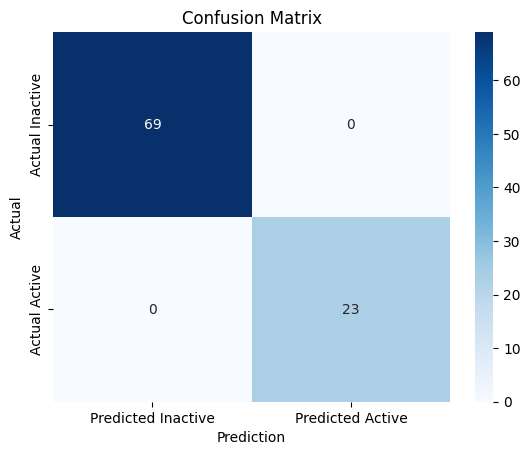

In [20]:
conf = confusion_matrix(y_test, y_pred)

sns.heatmap(conf, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Predicted Inactive', 'Predicted Active'],
            yticklabels = ['Actual Inactive', 'Actual Active'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model carries a precision of 100% for both active and inactive days, indicating that it correctly predicts 100% of these occurrences. The model also has a recall of 100% for active days, which indicates it accurately captures 10 out of 10 given days. This is likely due to the relatively small dataset (92 samples). While the score is promising superficially, it may not fully represent real-world performance. 

In [21]:
importance = rf.feature_importances_
feature_imp = pd.Series(importance, index = features).sort_values(ascending = True)

feature_imp

Calories             0.087295
VeryActiveMinutes    0.206771
TotalSteps           0.705934
dtype: float64

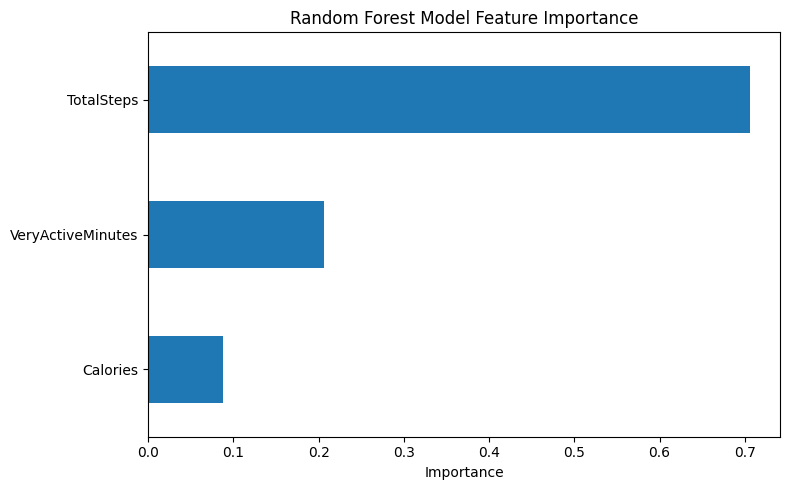

In [22]:
plt.figure(figsize = (8, 5))
feature_imp.plot(kind = 'barh', title = 'Random Forest Model Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

The model is most influenced by 'TotalSteps, 'VeryActiveMinutes', followed by 'VeryActiveMinutes', in predicting Active days. This is to be expected as the model's target variable is active days versus inactive days.